# 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')   


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import catboost as cbt

from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

In [2]:
train = pd.read_csv('./영화 관객수/movies_train.csv')
test = pd.read_csv('./영화 관객수/movies_test.csv')

In [3]:
test.shape

(243, 11)

In [4]:
train.shape

(600, 12)

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수 (target)

In [5]:
print('genre  :', train['genre'].unique())
print('distributor  :', train['distributor'].unique())
print('screening_rat  :', train['screening_rat'].unique())
print('director  :', train['director'].unique())

genre  : ['액션' '느와르' '코미디' '다큐멘터리' '뮤지컬' '드라마' '멜로/로맨스' '공포' '서스펜스' '애니메이션' '미스터리'
 'SF']
distributor  : ['롯데엔터테인먼트' '(주)쇼박스' '(주)NEW' '쇼박스(주)미디어플렉스' '백두대간' '유니버설픽쳐스인터내셔널코리아'
 '(주)두타연' '(주) 케이알씨지' '(주)콘텐츠 윙' '(주)키노아이' '(주)팝 파트너스' 'CJ E&M 영화부문'
 '(주) 영화제작전원사' 'CJ E&M Pictures' 'CGV 무비꼴라쥬' '리틀빅픽처스' '스폰지' 'CJ 엔터테인먼트'
 'CGV아트하우스' '조이앤시네마' '인디플러그' '콘텐츠판다' '인디스토리' '(주)팝엔터테인먼트' '시네마서비스' '웃기씨네'
 '영화사 진진' '(주)레인보우 팩토리' '김기덕 필름' 'NEW' 'CJ CGV' '동국대학교 충무로영상제작센터'
 'BoXoo 엔터테인먼트' '(주)마운틴픽쳐스' 'CGV 아트하우스' '메가박스(주)플러스엠' '골든타이드픽처스' '파이오니아21'
 '디 씨드' '드림팩트 엔터테인먼트' '시너지' '디마엔터테인먼트' '판다미디어' '(주)스톰픽쳐스코리아'
 '(주)예지림 엔터테인먼트' '(주) 영화사조제' '보람엔터테인먼트' '(주)시네마달' '노바엔터테인먼트' '(주)패스파인더씨앤씨'
 '(주)대명문화공장' '(주)온비즈넷' 'KT&G 상상마당' '무비꼴라쥬' '인벤트 디' '씨네그루(주)키다리이엔티'
 '스튜디오후크' '시네마 달' '나이너스엔터테인먼트(주)' 'THE 픽쳐스' '영구아트무비' '리틀빅픽쳐스' '어뮤즈'
 '이모션 픽처스' '(주)이스트스카이필름' '필라멘트 픽쳐스' '조이앤컨텐츠그룹' '타임스토리그룹' '마운틴 픽처스'
 '(주)휘엔터테인먼트' '이십세기폭스코리아(주)' '(주)피터팬픽쳐스' '에스와이코마드' '(주)더픽쳐스' '오퍼스픽쳐스'
 '(주)고앤고 필름' '사람과 사람들' '(주)JK필름' '씨너스엔터테인먼트(주)' 'KT' '싸이더스FNH

In [6]:
print('genre  :', test['genre'].unique())
print('distributor  :', test['distributor'].unique())
print('screening_rat  :', test['screening_rat'].unique())
print('director  :', test['director'].unique())

genre  : ['느와르' '멜로/로맨스' '드라마' '액션' '공포' '다큐멘터리' '코미디' '미스터리' '애니메이션' '서스펜스' '뮤지컬'
 'SF']
distributor  : ['시네마서비스' '(주)쇼박스' 'CJ 엔터테인먼트' '모쿠슈라' '시네마 달' '(주)루믹스미디어' '마운틴픽쳐스'
 '롯데쇼핑(주)롯데엔터테인먼트' '싸이더스' '시너지' '노근리 프로덕션' 'KT&G 상상마당' '롯데엔터테인먼트'
 '(주)키노아이' '쇼박스(주)미디어플렉스' '리얼라이즈픽쳐스' '(주)마운틴픽쳐스' '스폰지이엔티' '위드시네마' '청년필름'
 'NEW' '인디스토리' '리아코어콘텐츠' '스토리셋' '(주) 영화사조제' '씨네굿필름' '영화사 진진' '어뮤즈'
 '핑크로봇 필름' 'Cinema SAM' '필라멘트 픽쳐스' '갑종필름' '필마픽쳐스' '크리에이티브컴즈(주)'
 'CJ E&M Pictures' '오픈유컬쳐' '(주)NEW' '웃기씨네' '(주)드림웨스트픽쳐스' '골든타이드픽처스'
 '(주) 액티버스엔터테인먼트' '씨너스엔터테인먼트(주)' 'SBS콘텐츠허브' '타임스토리그룹' '(주)팝엔터테인먼트' '시네마달'
 '미로비젼' '나이너스엔터테인먼트(주)' '명필름' '(주)두타연' '(주) 영화제작전원사' '무비꼴라쥬' '인벤트 디'
 '프리비젼' '(주)미디어데이' '굿픽처스' '레몬트리' '타임스토리' '노바엔터테인먼트' '인디플러그' '(주)영화사 빅'
 '유나이티드 픽처스' '(유)영화사 화수분' 'BoXoo 엔터테인먼트' '늘푸른시네마' '(주)디씨드' '(주) 케이알씨지'
 '(주)노버스엔터테인먼트' '드림로드' '씨네그루(주)키다리이엔티' '(주)루스이소니도스' '에이원 엔터테인먼트'
 '애니메이션 배급' '(주)마인스 엔터테인먼트' '이십세기폭스코리아(주)' '트리필름' 'CGV아트하우스' '와우픽쳐스' '하준사'
 '오퍼스픽쳐스' '메가박스중앙(주)플러스엠' '리틀빅픽처스' '(주)에이원 엔터테인먼트' '미디어로그' '메가박스(

## 결측치 처리

In [7]:
print(train[train['dir_prev_num'] == 0].shape)
train[train['dir_prev_num'] == 0].isna().sum()

(330, 12)


title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [8]:
print(test[test['dir_prev_num'] == 0].shape)
test[test['dir_prev_num'] == 0].isna().sum()

(136, 11)


title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [9]:
train.fillna(0,inplace=True)
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [10]:
test.fillna(0,inplace=True)
test.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

## 가변수화

In [11]:
train['distributor'] = train.distributor.str.replace("(주)", '')
test['distributor'] = test.distributor.str.replace("(주)", '')

C:\Users\User\AppData\Local\Temp\ipykernel_10980\50988346.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['distributor'] = train.distributor.str.replace("(주)", '')
C:\Users\User\AppData\Local\Temp\ipykernel_10980\50988346.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['distributor'] = test.distributor.str.replace("(주)", '')


In [12]:
train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]

In [13]:
# 영화 배급사 도메인 지식 필요
list(train['distributor'].value_counts().index)

['CJ엔터테인먼트',
 '롯데엔터테인먼트',
 'NEW',
 '마운틴픽쳐스',
 '인디스토리',
 '쇼박스',
 '시네마달',
 '골든타이드픽처스',
 '케이알씨지',
 '영화사조제',
 '영화사진진',
 '시너지',
 '키노아이',
 '어뮤즈',
 '인디플러그',
 '인벤트디',
 'KTG상상마당',
 '리틀빅픽처스',
 '스폰지',
 'CGV아트하우스',
 '팝엔터테인먼트',
 '무비꼴라쥬',
 '시네마서비스',
 'BoXoo엔터테인먼트',
 '필라멘트픽쳐스',
 '마인스엔터테인먼트',
 '메가박스플러스엠',
 '드림팩트엔터테인먼트',
 '씨너스엔터테인먼트',
 '홀리가든',
 '나이너스엔터테인먼트',
 '엣나인필름',
 '마노엔터테인먼트',
 '마운틴픽처스',
 '이십세기폭스코리아',
 '트리필름',
 '이모션픽처스',
 '타임스토리그룹',
 'CJEM영화부문',
 '김기덕필름',
 '씨네그루키다리이엔티',
 '영화제작전원사',
 '싸이더스',
 'KT',
 '브릿지웍스',
 'SBS콘텐츠허브',
 '에이원엔터테인먼트',
 '화앤담이엔티',
 '싸이더스FNH',
 '와이드릴리즈',
 '리틀빅픽쳐스',
 '액티버스엔터테인먼트',
 '에스피엠',
 '프레인글로벌',
 '드림로드',
 '웃기씨네',
 '조이앤시네마',
 '쇼박스미디어플렉스',
 '백두대간',
 'CJEMPictures',
 '노바엔터테인먼트',
 '서울독립영화제',
 '파이오니아21',
 '스톰픽쳐스코리아',
 '판씨네마',
 '패뷸러스',
 '영화사조아',
 '두엔터테인먼트',
 '영화사',
 '전국제영화제',
 '프리비젼엔터테인먼트',
 '스마일이엔티',
 '미디어데이',
 '크리에이티브컴즈',
 'ysfilm',
 '이달투',
 '고구마공작소',
 'M2픽처스',
 '필름라인',
 '스튜디오느림보',
 '새인컴퍼니',
 '인피니티엔터테인먼트',
 '상구네필름',
 '에이블엔터테인먼트',
 '케이엠스타',
 '미라클필름',
 '프로젝트엠피',
 '머니필름',
 '롤러코스터프로덕션',
 '

In [14]:
def distributors(a):
    if 'CJ' in a or 'CGV' in a or '필라멘트' in a or 'JK' in a :
        return 'CJ'
    elif '쇼박스' in a:
        return '쇼박스'
    elif '콘텐츠판다' in a or 'NEW' in a:
         return 'NEW'
    elif '메가박스' in a:
        return '메가박스'
    elif '스폰지' in a :
        return '스폰지'
    elif '싸이더스' in a :
        return '싸이더스'
    elif '마운틴픽' in a :
        return '마운틴픽처스'
    else:
        return a

In [15]:
train['distributor'] = train.distributor.apply(distributors)

In [16]:
test['distributor'] = test.distributor.apply(distributors)

In [17]:
test['distributor'].value_counts().head(10)

CJ          35
롯데엔터테인먼트    24
마운틴픽처스      16
쇼박스         14
골든타이드픽처스    12
인디스토리       11
NEW         10
시네마달         7
KTG상상마당      6
케이알씨지        5
Name: distributor, dtype: int64

In [18]:
train['distributor'].value_counts().head(10)

CJ          75
롯데엔터테인먼트    52
NEW         39
마운틴픽처스      33
쇼박스         28
인디스토리       26
시네마달        18
골든타이드픽처스    15
케이알씨지       14
키노아이        10
Name: distributor, dtype: int64

In [19]:
distributor_rank = pd.DataFrame(train.groupby('distributor').box_off_num.median().sort_values())

In [20]:
distributor_rank['rank'] = [i +1 for i in range(0,distributor_rank.shape[0])]

In [21]:
distributor_rank.drop('box_off_num',axis=1,inplace=True)

In [22]:
distributor_rank

rank
distributor      
인피니티엔터테인먼트      1
고구마공작소          2
사람과사람들          3
위드시네마           4
나우콘텐츠           5
...           ...
SK텔레콤         142
이십세기폭스코리아     143
쇼박스           144
영구아트무비        145
아이필름코퍼레이션     146

[146 rows x 1 columns]

In [23]:
train = pd.merge(train, distributor_rank, left_on='distributor', right_index=True)

In [24]:
train.shape

(600, 13)

In [25]:
test_ = pd.merge(test, distributor_rank, left_on='distributor', right_index=True,how='outer')

In [26]:
test = test_.dropna(axis=0,subset='title')

In [27]:
genre_list = list(train.groupby('genre')['box_off_num'].mean().sort_values().index)

genre_dic = {}

rank = 1

for e in genre_list:
    genre_dic[e] = rank
    rank += 1


In [28]:
train['genre_rank'] = train['genre'].map(genre_dic)
test['genre_rank'] = test['genre'].map(genre_dic)

C:\Users\User\AppData\Local\Temp\ipykernel_10980\3285670102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['genre_rank'] = test['genre'].map(genre_dic)


In [29]:
train = pd.get_dummies(train,columns=['screening_rat'],drop_first=True)

In [30]:
test = pd.get_dummies(test,columns=['screening_rat'],drop_first=True)

In [31]:
test.loc[test['rank'].isnull(),'rank'] = 1

In [32]:
test.isna().sum()

title                     0
distributor               0
genre                     0
release_time              0
time                      0
director                  0
dir_prev_bfnum            0
dir_prev_num              0
num_staff                 0
num_actor                 0
rank                      0
genre_rank                0
screening_rat_15세 관람가     0
screening_rat_전체 관람가      0
screening_rat_청소년 관람불가    0
dtype: int64

## Feature 정리

In [33]:
train.drop(['title','director','distributor','genre','release_time'],axis=1,inplace=True)
train.head()

time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  \
0     96             0.0             0         91          2        23398   
5    113        837969.0             2        262          4       233211   
23   108         75740.0             1        288          3       781516   
41    87       4598985.0             1        182          3        38809   
59   124        372863.0             2        319          3      2971475   

    rank  genre_rank  screening_rat_15세 관람가  screening_rat_전체 관람가  \
0    134          11                      0                     0   
5    134           9                      1                     0   
23   134           8                      0                     0   
41   134           5                      0                     0   
59   134          12                      0                     0   

    screening_rat_청소년 관람불가  
0                        1  
5                        0  
23                       1  
41                       1  
59                       1

In [34]:
test_data = test.drop(['title','director','distributor','genre','release_time'],axis=1)
test_data.head()

time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor   rank  \
0.0   125.0       300529.00           2.0      304.0        3.0  132.0   
1.0   113.0       342700.25           4.0      275.0        3.0  144.0   
3.0   116.0       691342.00           2.0      408.0        2.0  144.0   
17.0  121.0            0.00           0.0      329.0        2.0  144.0   
42.0  105.0            0.00           0.0       18.0        7.0  144.0   

      genre_rank  screening_rat_15세 관람가  screening_rat_전체 관람가  \
0.0           12                      0                     0   
1.0            5                      0                     0   
3.0           11                      1                     0   
17.0           8                      0                     1   
42.0          11                      0                     0   

      screening_rat_청소년 관람불가  
0.0                        1  
1.0                        0  
3.0                        0  
17.0                       0  
42.0                       0

In [458]:
test_data.isna().sum()

time                      0
dir_prev_bfnum            0
dir_prev_num              0
num_staff                 0
num_actor                 0
rank                      0
genre_rank                0
screening_rat_15세 관람가     0
screening_rat_전체 관람가      0
screening_rat_청소년 관람불가    0
dtype: int64

In [35]:
train.to_csv('train.csv')
test.drop(['director','distributor','genre','release_time'],axis=1).to_csv('test.csv')

# 데이터 분석

In [327]:
import DataAnalysis_ksw as da

## 단변량 분석

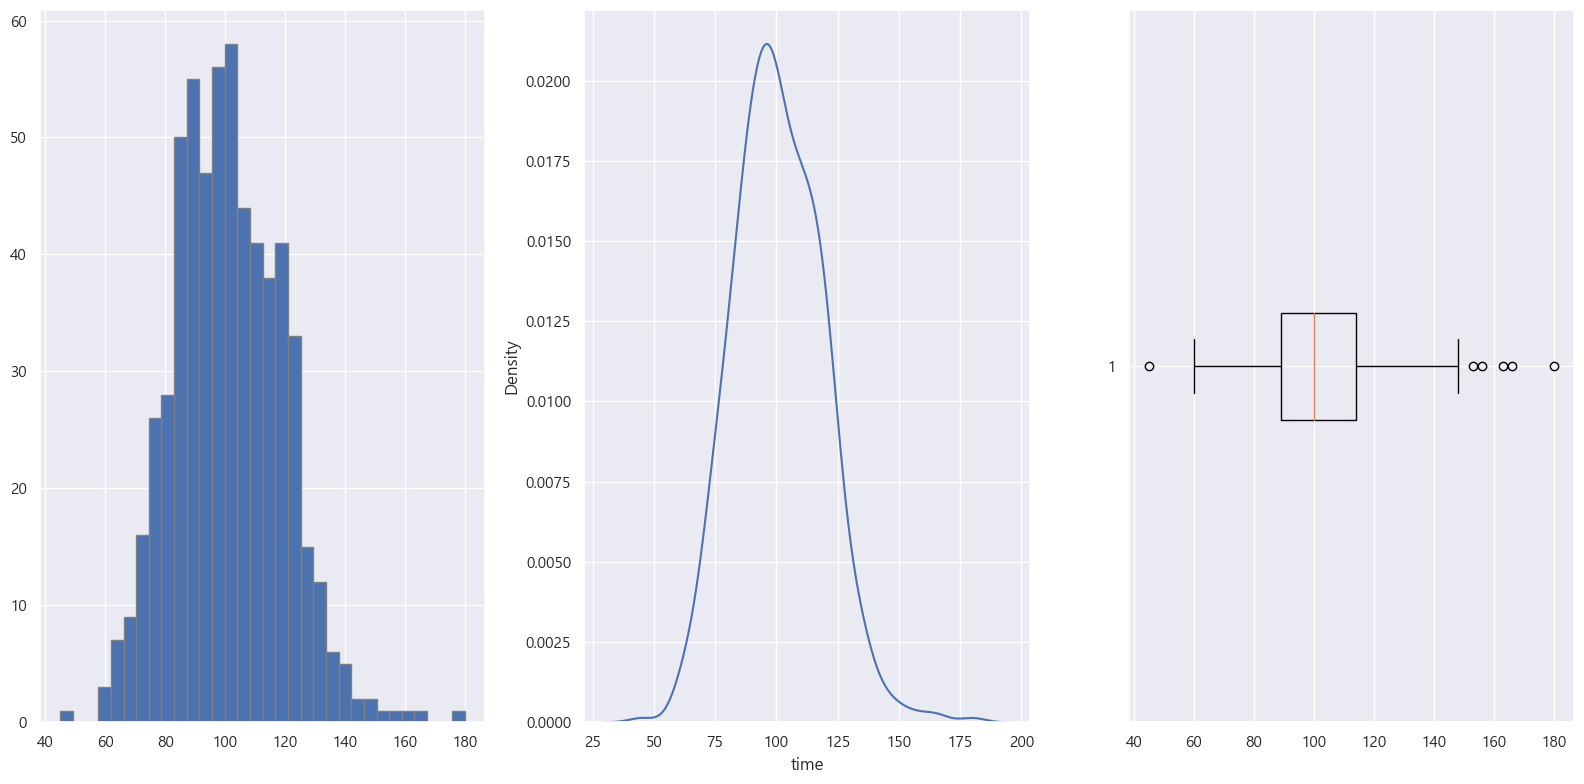

smaller :  [89. 60.]
bigger :  [114. 148.]
count    600.000000
mean     100.863333
std       18.097528
min       45.000000
25%       89.000000
50%      100.000000
75%      114.000000
max      180.000000
Name: time, dtype: float64


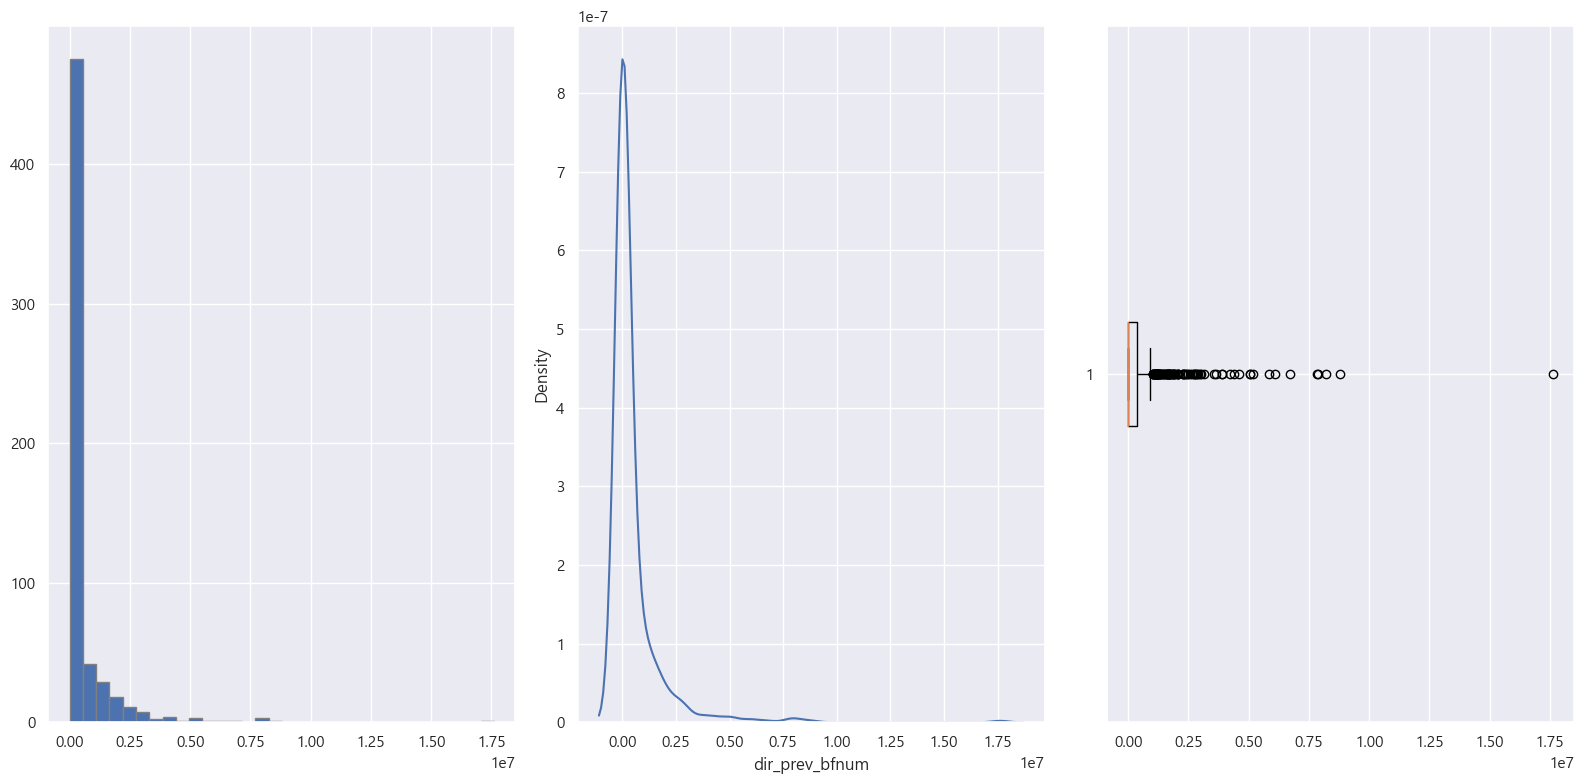

smaller :  [0. 0.]
bigger :  [376141.625 922680.   ]
count    6.000000e+02
mean     4.726993e+05
std      1.309474e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.761416e+05
max      1.761531e+07
Name: dir_prev_bfnum, dtype: float64


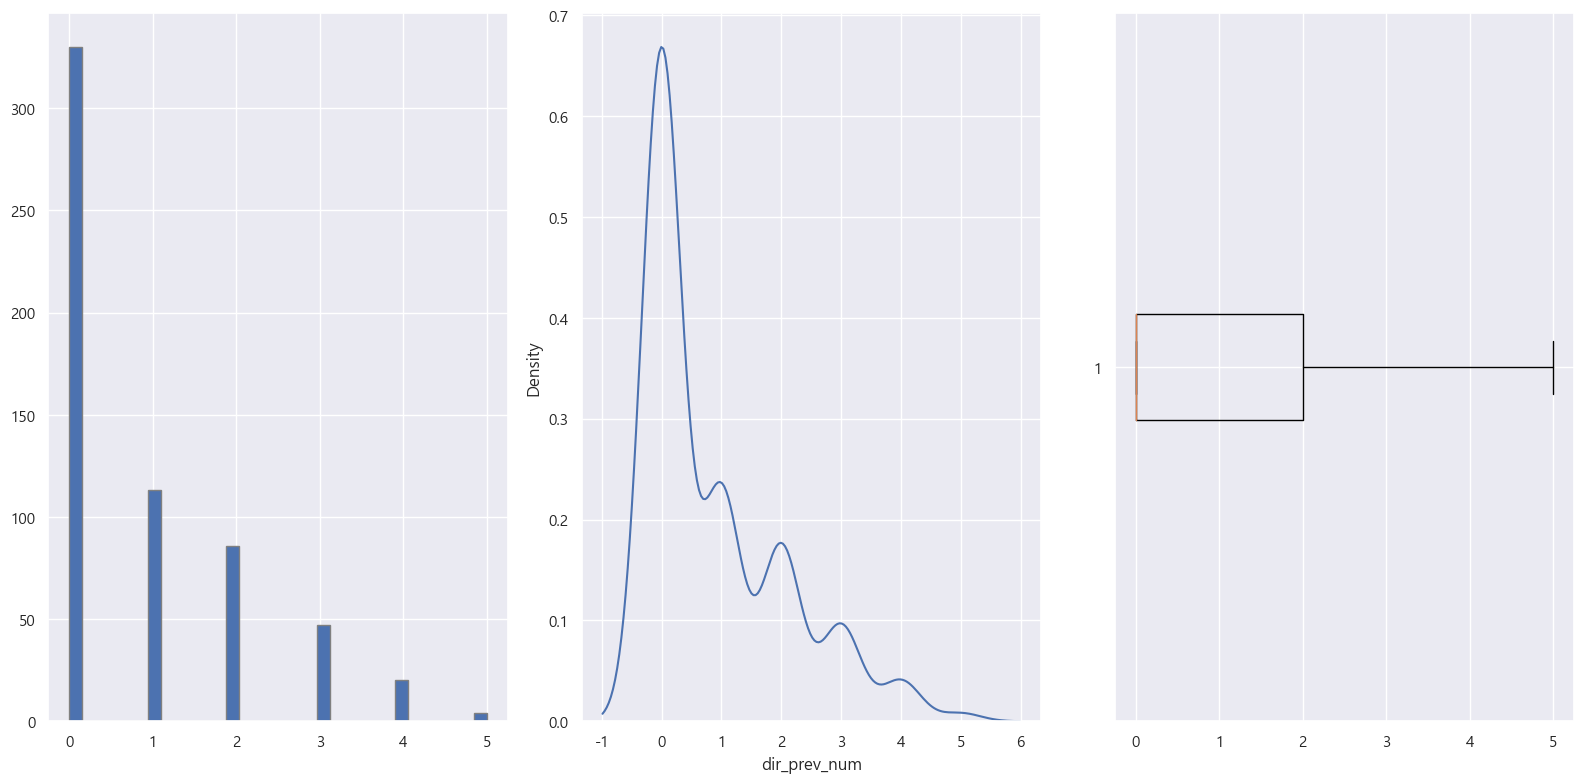

smaller :  [0. 0.]
bigger :  [2. 5.]
count    600.000000
mean       0.876667
std        1.183409
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: dir_prev_num, dtype: float64


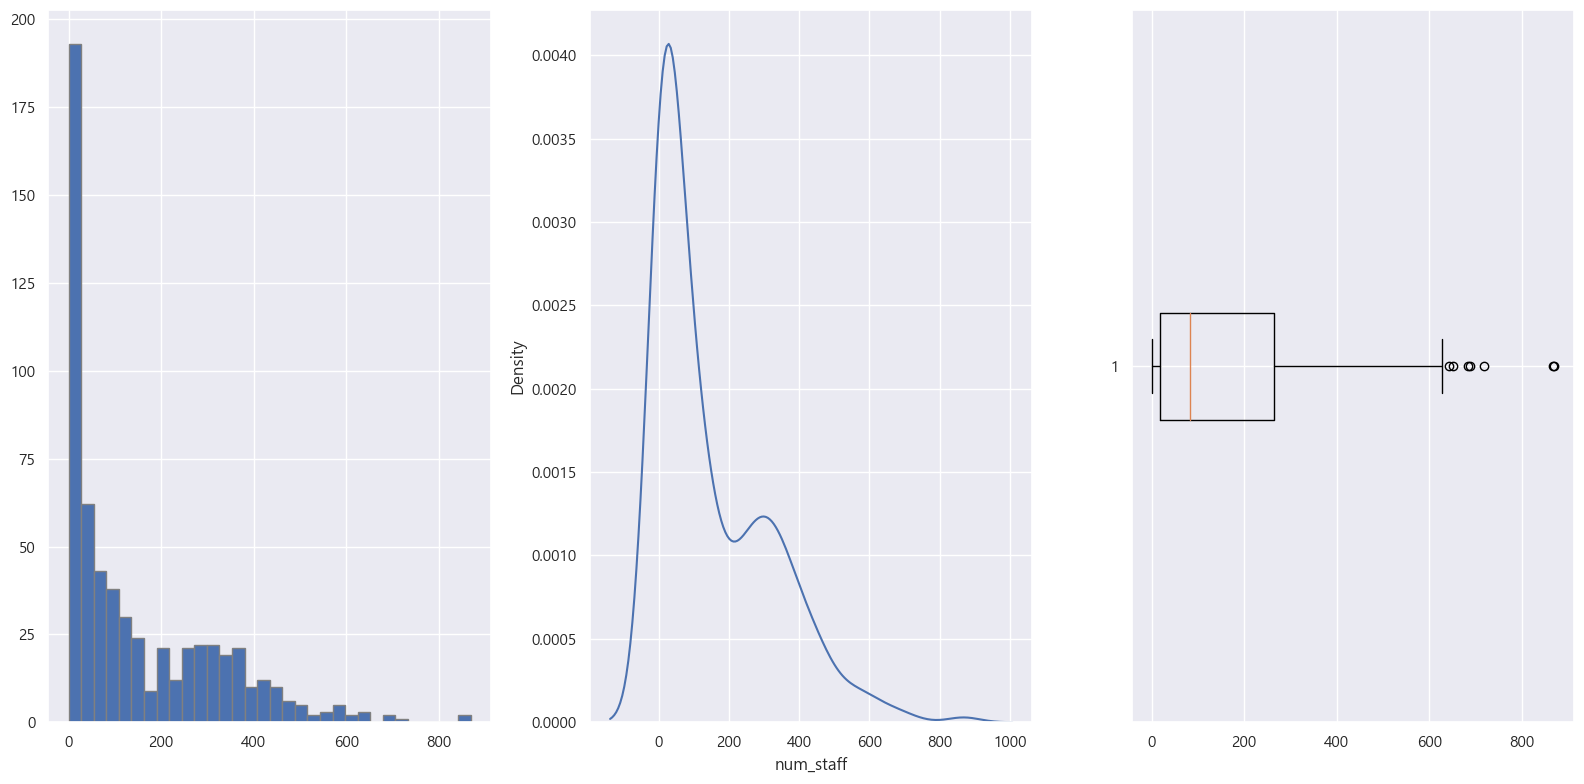

smaller :  [17.  0.]
bigger :  [264. 628.]
count    600.000000
mean     151.118333
std      165.654671
min        0.000000
25%       17.000000
50%       82.500000
75%      264.000000
max      869.000000
Name: num_staff, dtype: float64


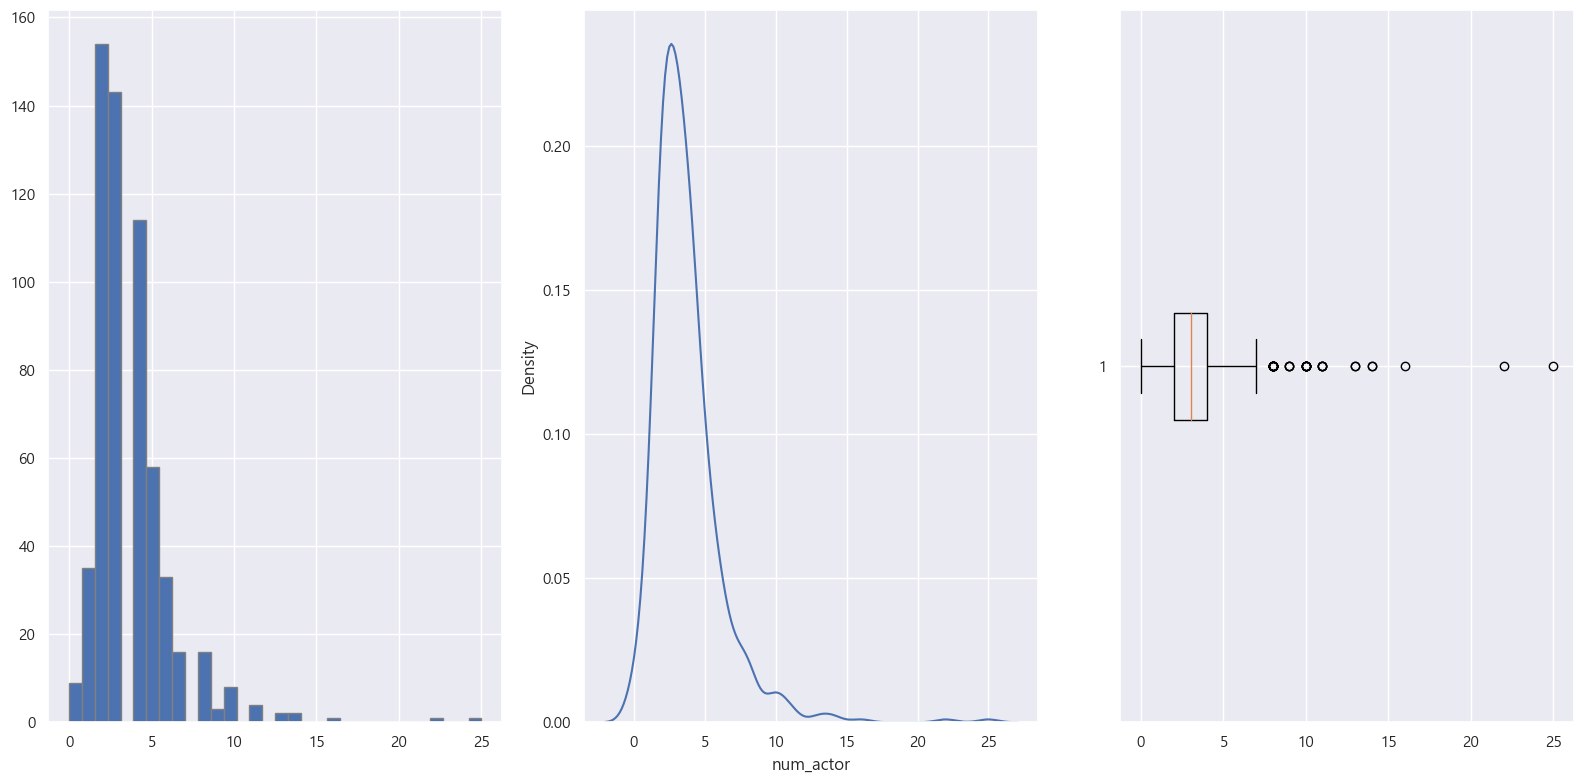

smaller :  [2. 0.]
bigger :  [4. 7.]
count    600.000000
mean       3.706667
std        2.446889
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       25.000000
Name: num_actor, dtype: float64


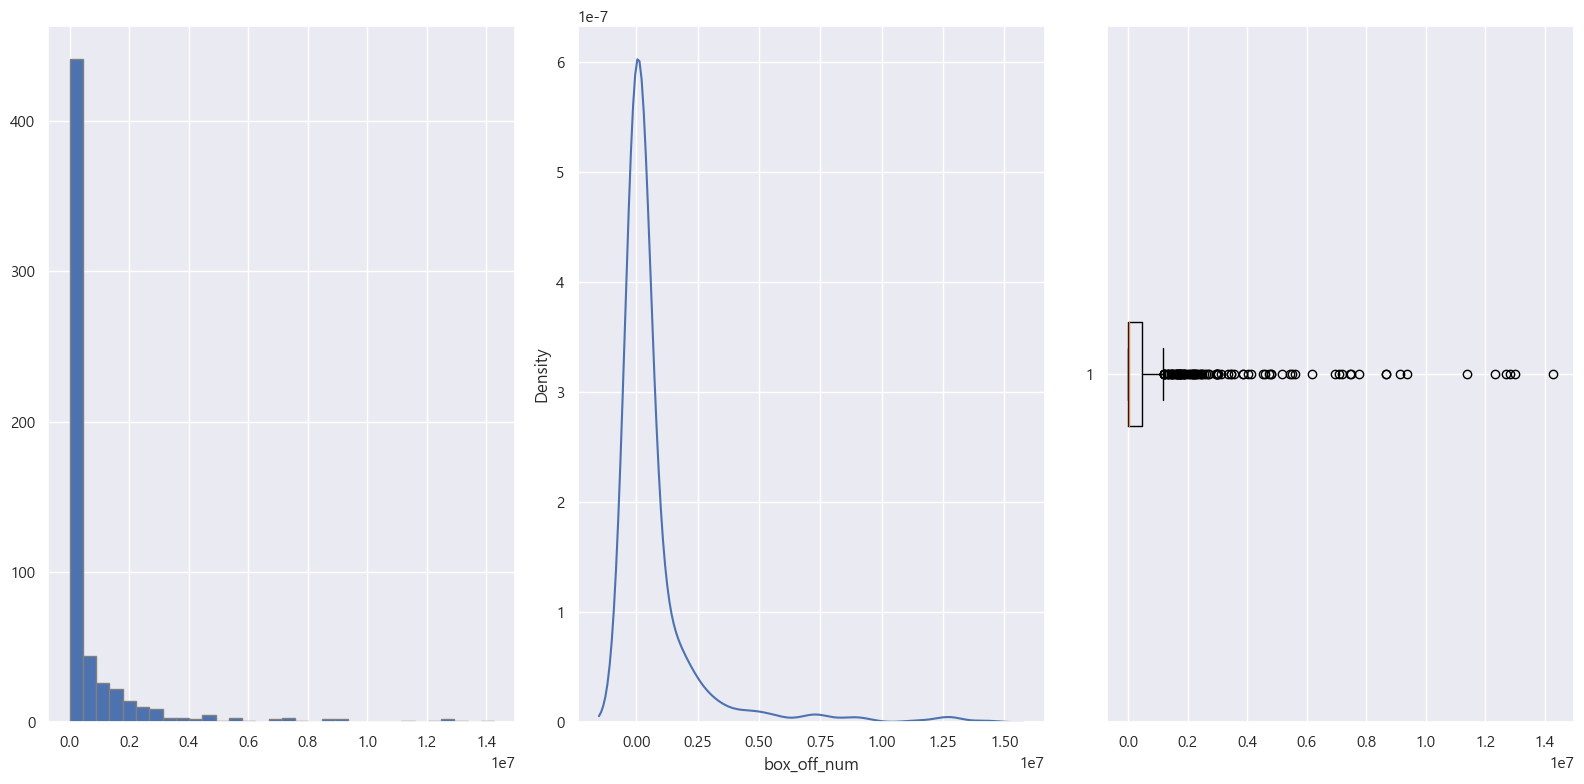

smaller :  [1.29725e+03 1.00000e+00]
bigger :  [ 479886.75 1177435.  ]
count    6.000000e+02
mean     7.081818e+05
std      1.828006e+06
min      1.000000e+00
25%      1.297250e+03
50%      1.259100e+04
75%      4.798868e+05
max      1.426277e+07
Name: box_off_num, dtype: float64


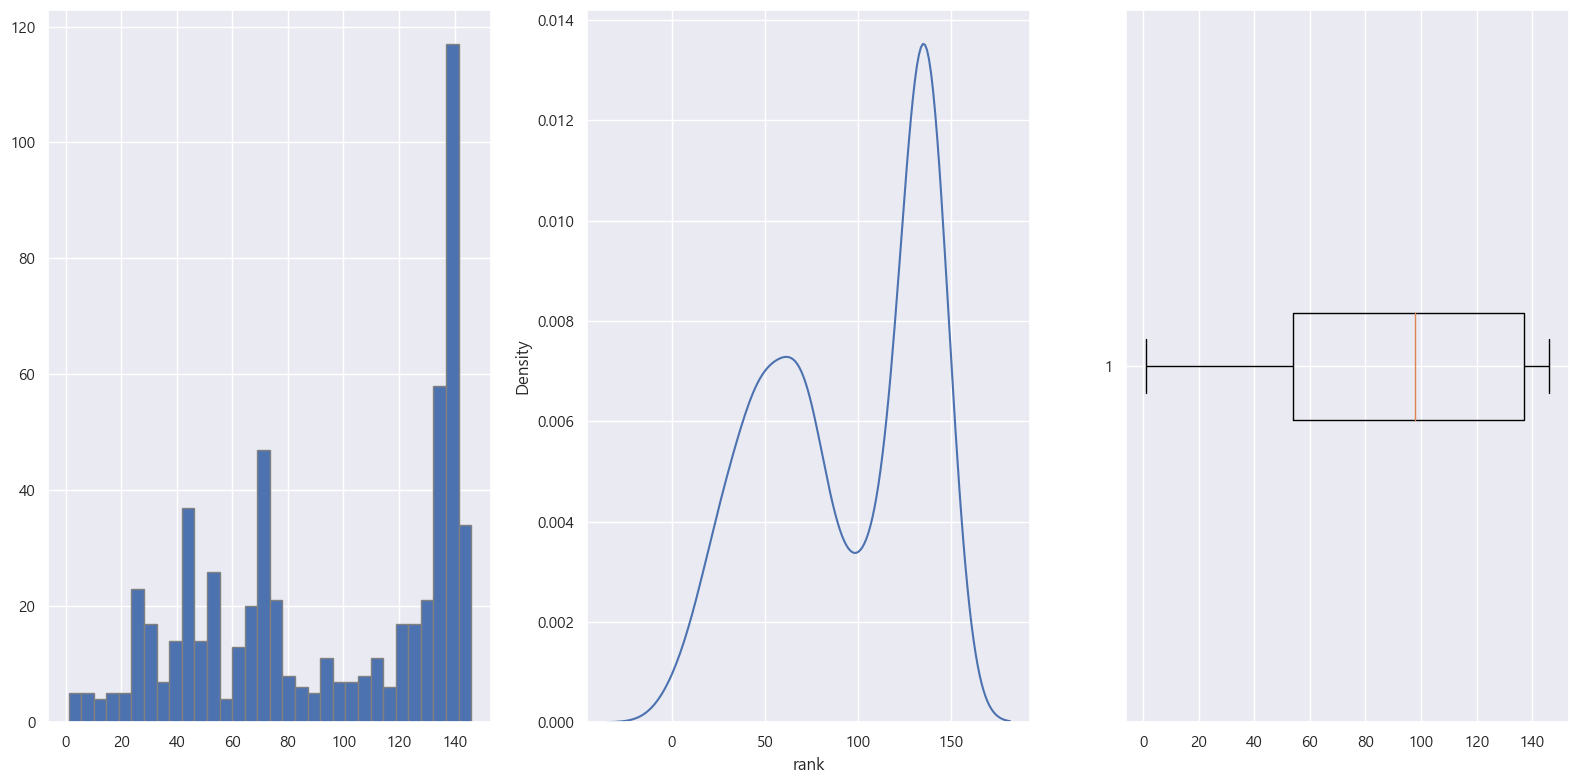

smaller :  [53.75  1.  ]
bigger :  [137. 146.]
count    600.000000
mean      93.008333
std       42.881421
min        1.000000
25%       53.750000
50%       98.000000
75%      137.000000
max      146.000000
Name: rank, dtype: float64


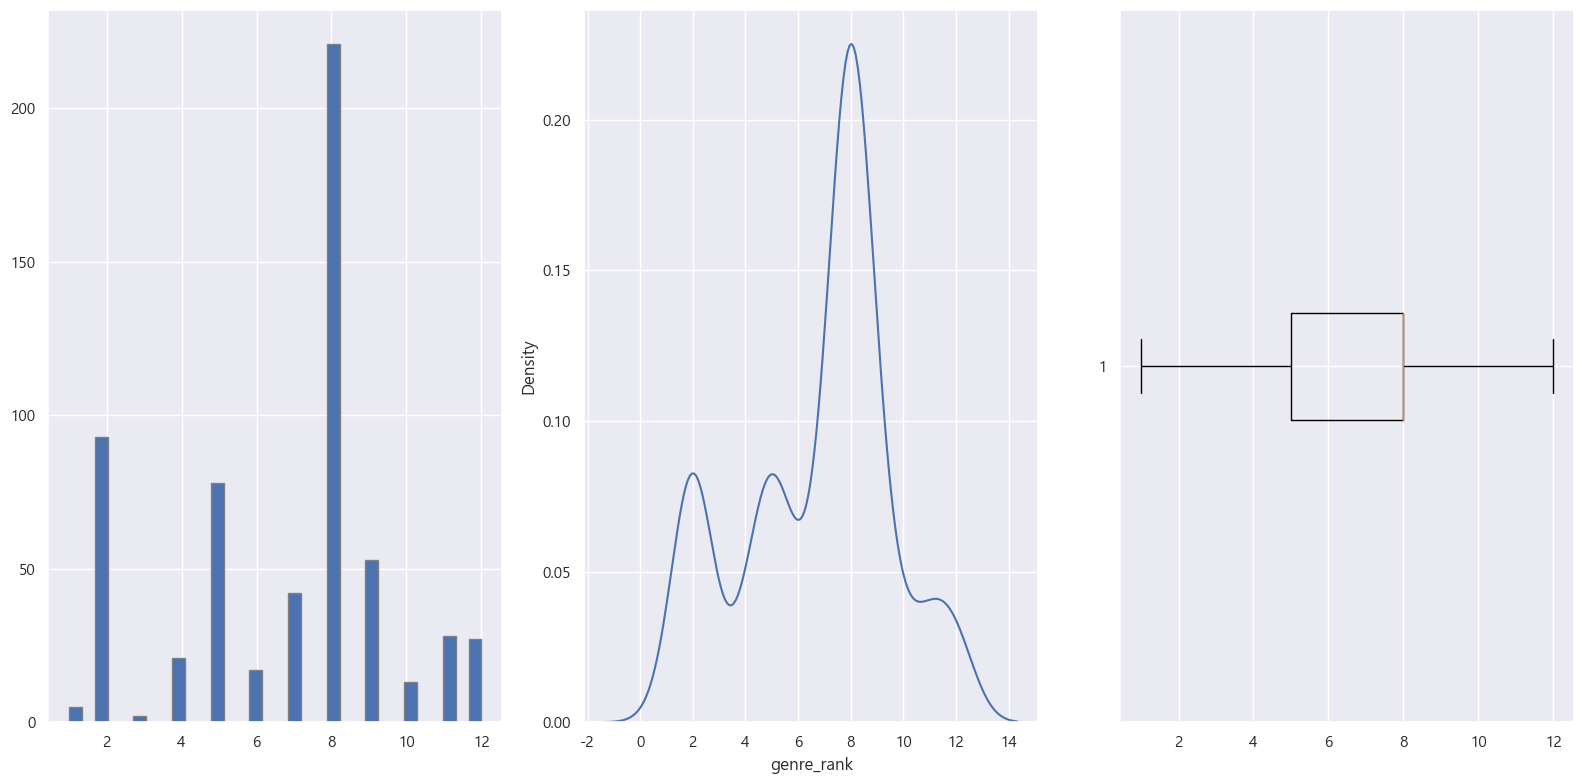

smaller :  [5. 1.]
bigger :  [ 8. 12.]
count    600.000000
mean       6.790000
std        2.801603
min        1.000000
25%        5.000000
50%        8.000000
75%        8.000000
max       12.000000
Name: genre_rank, dtype: float64
0    0.663333
1    0.336667
Name: screening_rat_15세 관람가, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


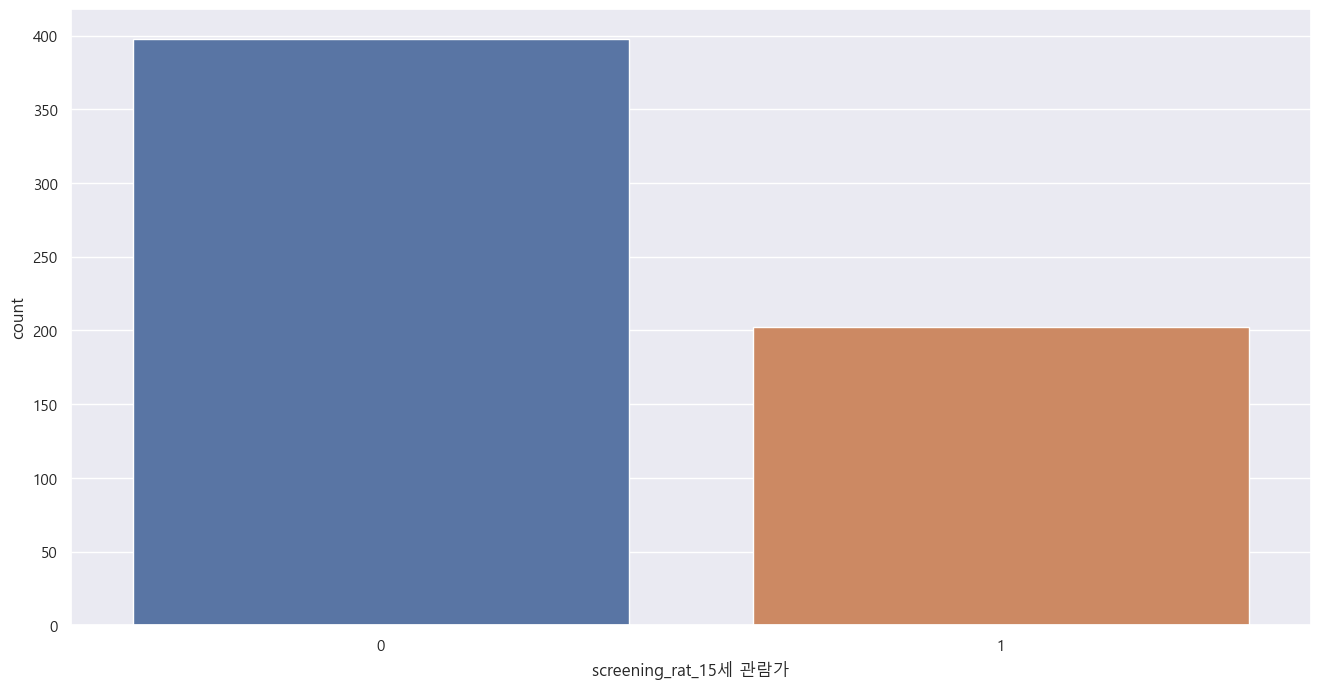

0    0.846667
1    0.153333
Name: screening_rat_전체 관람가, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


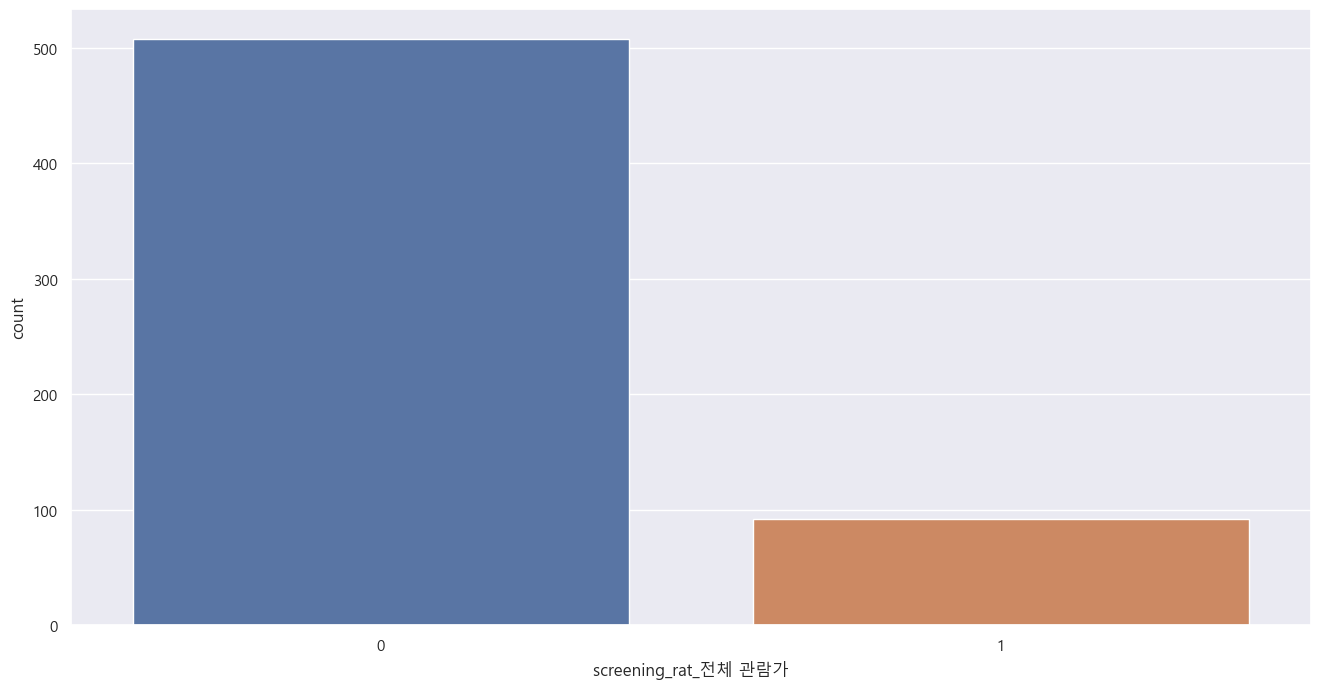

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    0.66
1    0.34
Name: screening_rat_청소년 관람불가, dtype: float64


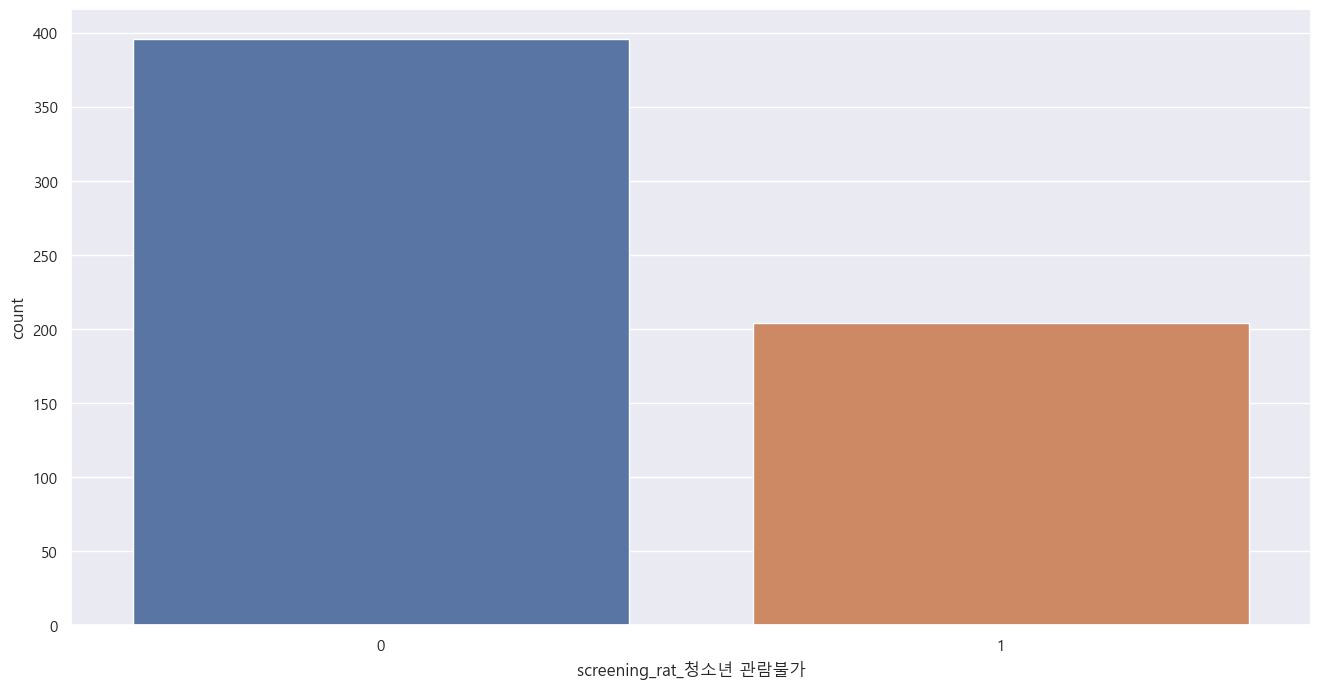

In [463]:
cat_lst = ['screening_rat']

for col in train.columns:
    
    if col == 'release_time' : continue
    if col == 'title' : continue
    
    flag = True
    plt.figure(figsize=(16,8))
    for cat in cat_lst:
        if cat in col:
            da.Unvariate(train,col,'cat')
            flag = False
            break
        
    if flag:
        da.Unvariate(train,col,'num')
        
    
        

## 이변량 분석

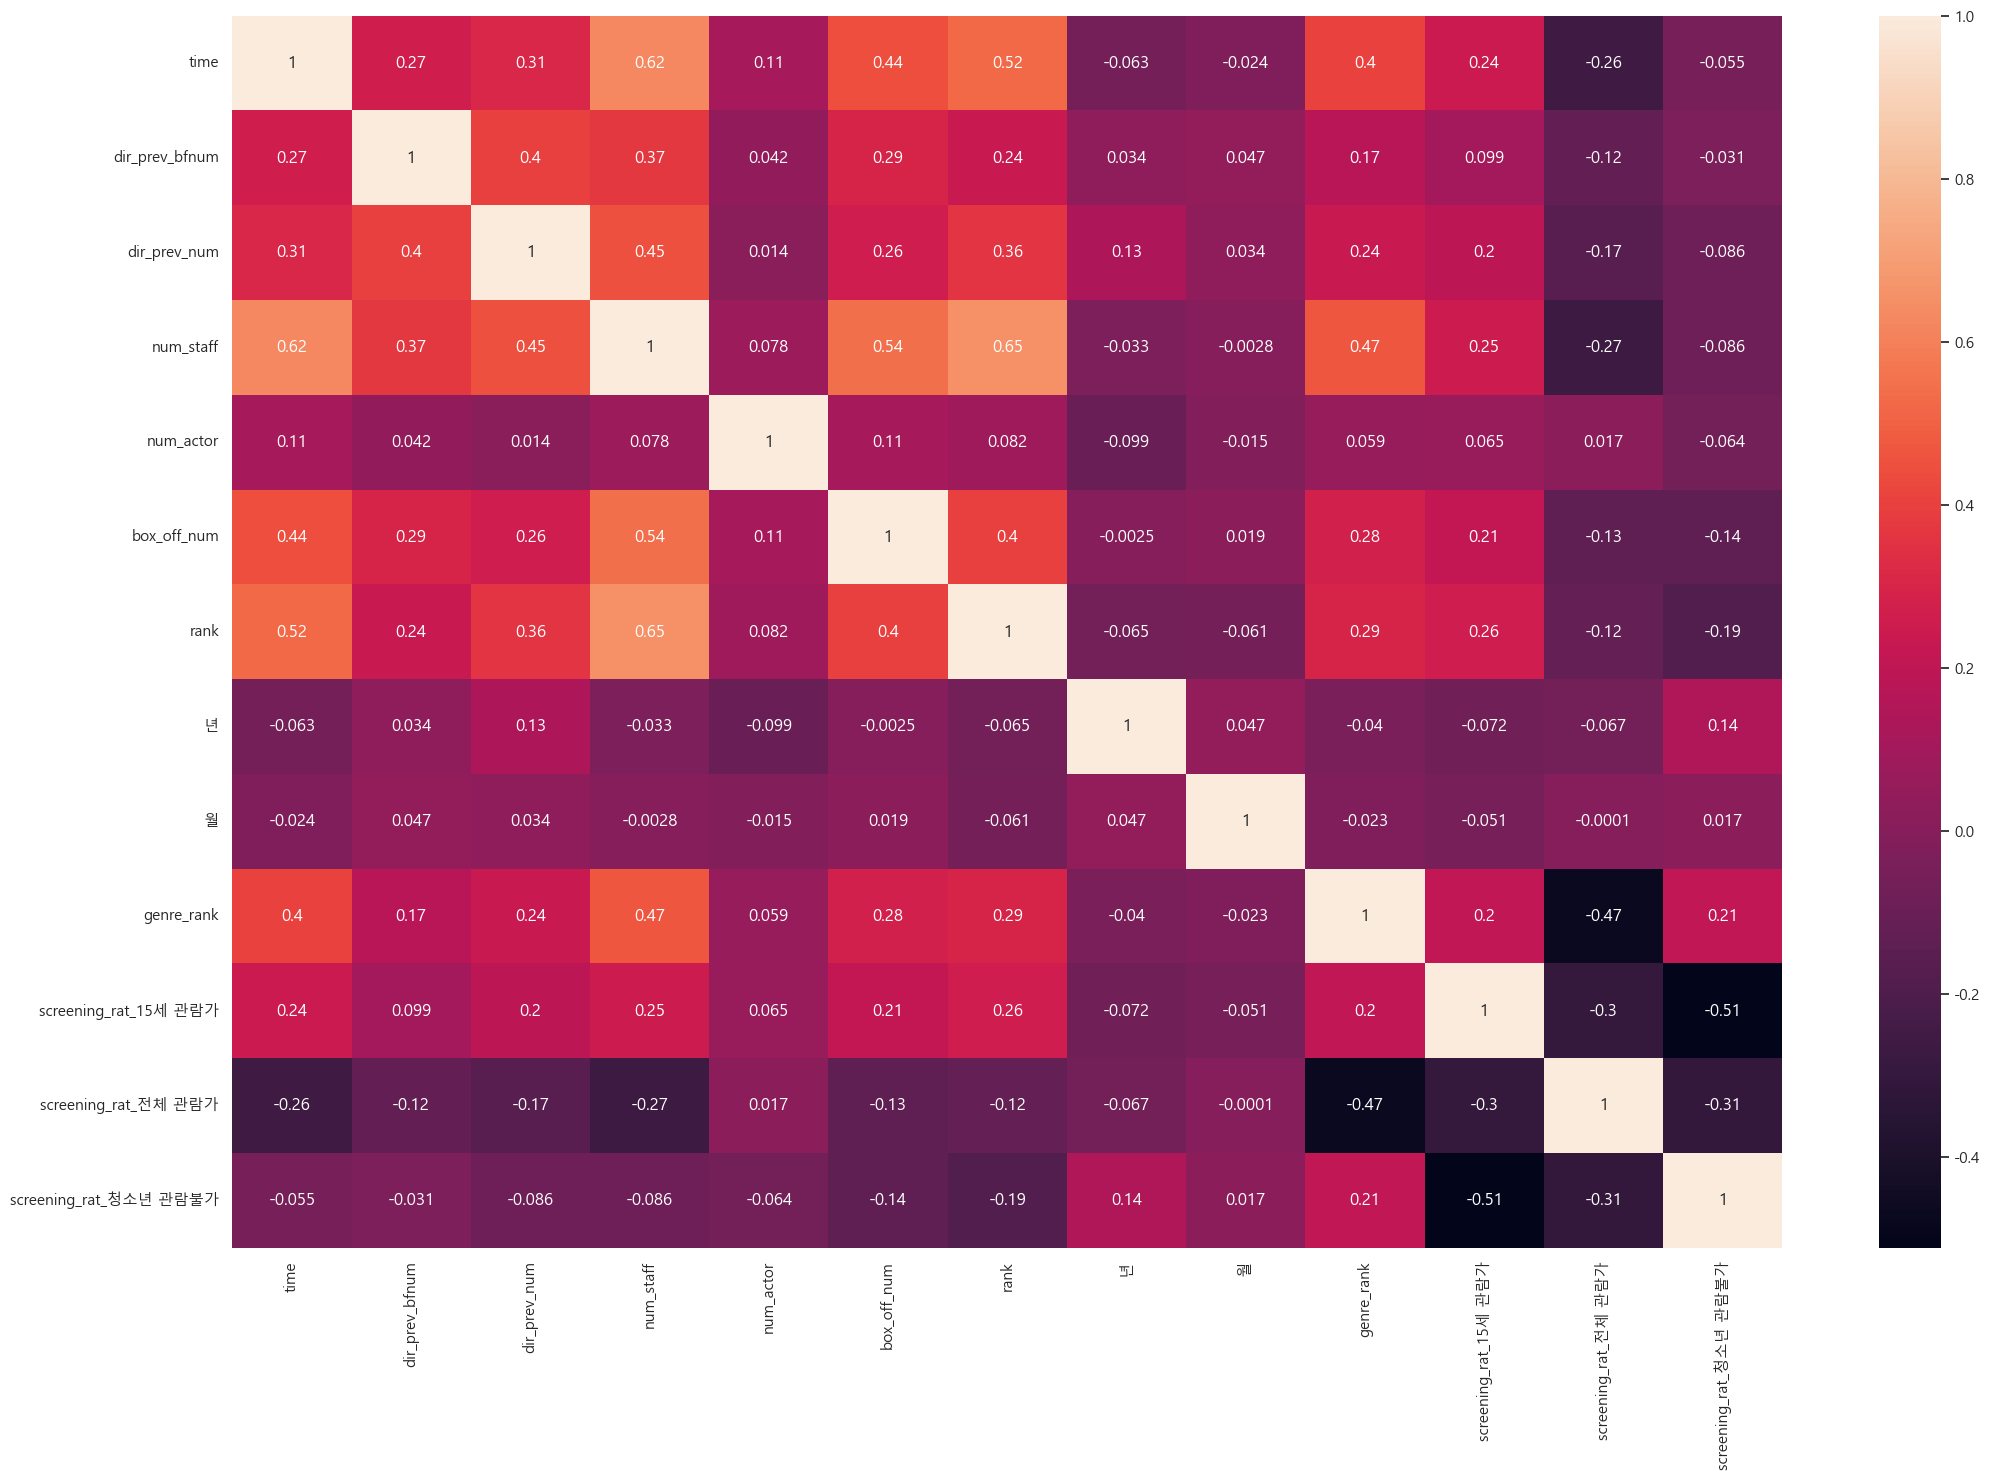

In [81]:
plt.figure(figsize=(25,16))

sns.heatmap(train.corr(),annot = True)
plt.show()

# 데이터 나누기

In [459]:
from sklearn.model_selection import train_test_split

In [480]:
x = train.drop(['box_off_num'],axis=1)
y = train['box_off_num']

In [461]:
x.head()

time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  rank  \
0     96             0.0             0         91          2   134   
5    113        837969.0             2        262          4   134   
23   108         75740.0             1        288          3   134   
41    87       4598985.0             1        182          3   134   
59   124        372863.0             2        319          3   134   

    genre_rank  screening_rat_15세 관람가  screening_rat_전체 관람가  \
0           11                      0                     0   
5            9                      1                     0   
23           8                      0                     0   
41           5                      0                     0   
59          12                      0                     0   

    screening_rat_청소년 관람불가  
0                        1  
5                        0  
23                       1  
41                       1  
59                       1

In [462]:
test_data.head()

time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor   rank  \
0.0   125.0       300529.00           2.0      304.0        3.0  132.0   
1.0   113.0       342700.25           4.0      275.0        3.0  144.0   
3.0   116.0       691342.00           2.0      408.0        2.0  144.0   
17.0  121.0            0.00           0.0      329.0        2.0  144.0   
42.0  105.0            0.00           0.0       18.0        7.0  144.0   

      genre_rank  screening_rat_15세 관람가  screening_rat_전체 관람가  \
0.0           12                      0                     0   
1.0            5                      0                     0   
3.0           11                      1                     0   
17.0           8                      0                     1   
42.0          11                      0                     0   

      screening_rat_청소년 관람불가  
0.0                        1  
1.0                        0  
3.0                        0  
17.0                       0  
42.0                       0

## 로그 변환

In [473]:
#x['dir_prev_bfnum'] = np.log1p(x['dir_prev_bfnum'])
#x['num_staff'] = np.log1p(x['num_staff'])
#y = np.log1p(y)
x['num_actor'] = np.log1p(x['num_actor'])

In [466]:
#test_data['dir_prev_bfnum'] = np.log1p(test_data['dir_prev_bfnum'])
#test_data['num_staff'] = np.log1p(test_data['num_staff'])
#test_data['num_actor'] = np.log1p(test_data['num_actor'])

In [481]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3)

In [475]:
y_train_s = np.log1p(y_train)
y_val_s = np.log1p(y_val)

# 모델링

In [469]:
import Util_for_sklearn_ksw as ufs
from sklearn.inspection import permutation_importance

## LinearRegression

In [482]:
lst,df = ufs.forward_stepwise_linear(x_train,y_train)
print(lst)

['num_staff', 'dir_prev_bfnum', 'time', 'screening_rat_청소년 관람불가']


In [483]:
model_line = LinearRegression()

model_line_g = GridSearchCV(model_line,dict(),cv=10,verbose=3)

model_line_g.fit(x_train[lst],y_train)



Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .................................., score=0.555 total time=   0.0s
[CV 2/10] END .................................., score=0.396 total time=   0.0s
[CV 3/10] END .................................., score=0.343 total time=   0.0s
[CV 4/10] END .................................., score=0.171 total time=   0.0s
[CV 5/10] END .................................., score=0.285 total time=   0.0s
[CV 6/10] END ................................., score=-0.781 total time=   0.0s
[CV 7/10] END .................................., score=0.296 total time=   0.0s
[CV 8/10] END ................................., score=-0.972 total time=   0.0s
[CV 9/10] END .................................., score=0.424 total time=   0.0s
[CV 10/10] END ................................., score=0.072 total time=   0.0s


GridSearchCV(cv=10, estimator=LinearRegression(), param_grid={}, verbose=3)

In [484]:
pred_line = model_line_g.predict(x_val[lst])
ufs.Regressor_report(y_val,pred_line)

MAE :  761461.907189468
MAPE :  4225.238881914967
RMSE :  1553480.614715002


In [485]:
ufs.Regressor_report(y_val,np.expm1(pred_line))

C:\Users\User\AppData\Local\Temp\ipykernel_16140\2128407572.py:1: RuntimeWarning: overflow encountered in expm1
  ufs.Regressor_report(y_val,np.expm1(pred_line))


ValueError: Input contains infinity or a value too large for dtype('float64').

## XGBoost

In [530]:
from xgboost import XGBRegressor

In [533]:
model_xgb = XGBRegressor()

params_xgb =   {  
                'n_estimators': range(50,200,20),         
                'learning_rate': np.linspace(0.01,0.5,5),
                'max_depth': range(2,11,2),
                }

model_xgb_g = GridSearchCV(model_xgb,params_xgb,cv=10,verbose=3)


In [534]:
model_xgb_g.fit(x_train,y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV 1/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.145 total time=   0.0s
[CV 2/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.121 total time=   0.0s
[CV 3/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.188 total time=   0.0s
[CV 4/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.099 total time=   0.0s
[CV 5/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.126 total time=   0.0s
[CV 6/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.595 total time=   0.0s
[CV 7/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.103 total time=   0.0s
[CV 8/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.386 total time=   0.0s
[CV 9/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.304 total time=   0.0s
[CV 10/10] END learning_rate=0.01, max_depth=2, n_estimators=50;, score

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...ne,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': array([0.01  , 0.1325, 0.255 , 0.3775, 0.5   ]),
                         'max_depth': range(2, 11, 2),
                         'n_estimators': range(50, 200, 20)},
             verbose=3)

In [538]:
model_xgb_g.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 130}

In [535]:
pred_xgb = model_xgb_g.predict(x_val)

In [537]:
ufs.Regressor_report(y_val,pred_xgb)

MAE :  582811.1801215278
MAPE :  714.8703519227541
RMSE :  1527781.7194102425


## RandomForest

In [382]:
model_rf = RandomForestRegressor()

params_rf = {'n_estimators':range(10,80,20),'max_depth':range(5,10),'min_samples_leaf':range(10,50,10)}

model_rf_g = GridSearchCV(model_rf,params_rf,cv=10,verbose=3)

In [497]:
model_rf_g.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV 1/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.671 total time=   0.0s
[CV 2/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.306 total time=   0.0s
[CV 3/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.420 total time=   0.0s
[CV 4/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.305 total time=   0.0s
[CV 5/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.340 total time=   0.0s
[CV 6/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=-1.859 total time=   0.0s
[CV 7/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.068 total time=   0.0s
[CV 8/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=-0.677 total time=   0.0s
[CV 9/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.434 total time=   0.0s
[CV 10/10] END max_depth=5, min_samples_leaf=10, n_estimators=

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(10, 50, 10),
                         'n_estimators': range(10, 80, 20)},
             verbose=3)

In [498]:
model_rf_g.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'n_estimators': 10}

In [500]:
cv_rf = pd.DataFrame(model_rf_g.cv_results_)
cv_rf.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.022171      0.003069         0.003522        0.001117   
1       0.055840      0.009406         0.005142        0.001070   
2       0.087922      0.017028         0.008066        0.002993   
3       0.144802      0.033038         0.011702        0.004450   
4       0.018951      0.003915         0.003186        0.000921   

  param_max_depth param_min_samples_leaf param_n_estimators  \
0               5                     10                 10   
1               5                     10                 30   
2               5                     10                 50   
3               5                     10                 70   
4               5                     20                 10   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 10, 'n_es...           0.671243   
1  {'max_depth': 5, 'min_samples_leaf': 10, 'n_es...           0.623052   
2  {'max_depth': 5, 'min_samples_leaf': 10, 'n_es...           0.603618   
3  {'max_depth': 5, 'min_samples_leaf': 10, 'n_es...           0.564764   
4  {'max_depth': 5, 'min_samples_leaf': 20, 'n_es...           0.528347   

   split1_test_score  ...  split3_test_score  split4_test_score  \
0           0.306291  ...           0.305309           0.340396   
1           0.395154  ...           0.262734           0.285332   
2           0.369884  ...           0.322690           0.279020   
3           0.362452  ...           0.300549           0.307295   
4           0.360637  ...           0.210231           0.374727   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0          -1.858756           0.068224          -0.677247           0.434301   
1          -1.470652           0.153297          -0.752146           0.519270   
2          -1.720652           0.113693          -0.423521           0.532102   
3          -1.306751           0.042726          -0.499283           0.518391   
4          -0.823443           0.087090          -0.252377           0.504849   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.075987         0.008557        0.710047               79  
1           0.169898         0.062613        0.624492               74  
2           0.202092         0.069751        0.654723               71  
3           0.227647         0.098966        0.551277               56  
4           0.252193         0.162726        0.393074                5  

[5 rows x 21 columns]

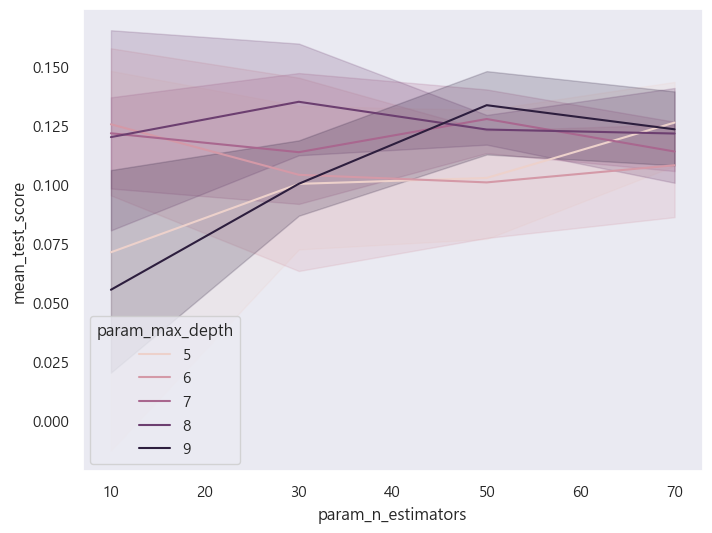

In [501]:
ufs.mean_test_score_lineplot(cv_rf,x='param_n_estimators',hue='param_max_depth')

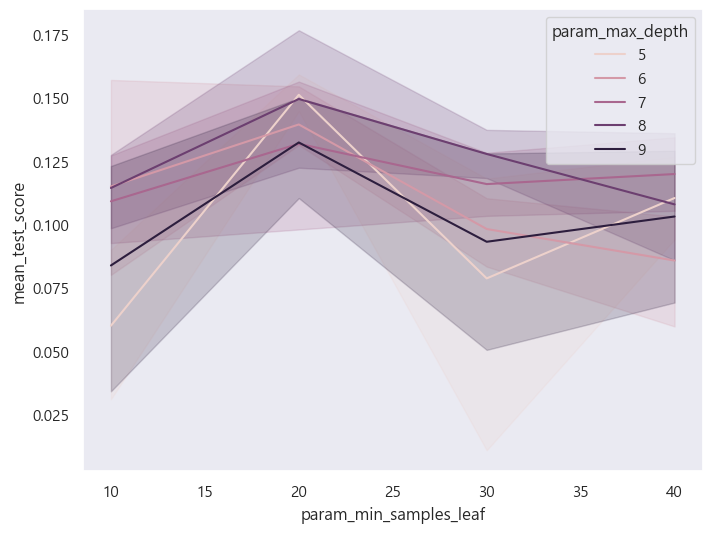

In [502]:
ufs.mean_test_score_lineplot(cv_rf,x='param_min_samples_leaf',hue='param_max_depth')

feature_names  feature_importance
0                    time        4.253197e-01
1               num_staff        3.760282e-01
2                    rank        1.569647e-01
3              genre_rank        3.720680e-02
4          dir_prev_bfnum        4.475283e-03
5    screening_rat_전체 관람가        5.154971e-06
6               num_actor        9.045798e-08
7  screening_rat_청소년 관람불가        8.705420e-08
8            dir_prev_num        0.000000e+00
9   screening_rat_15세 관람가        0.000000e+00

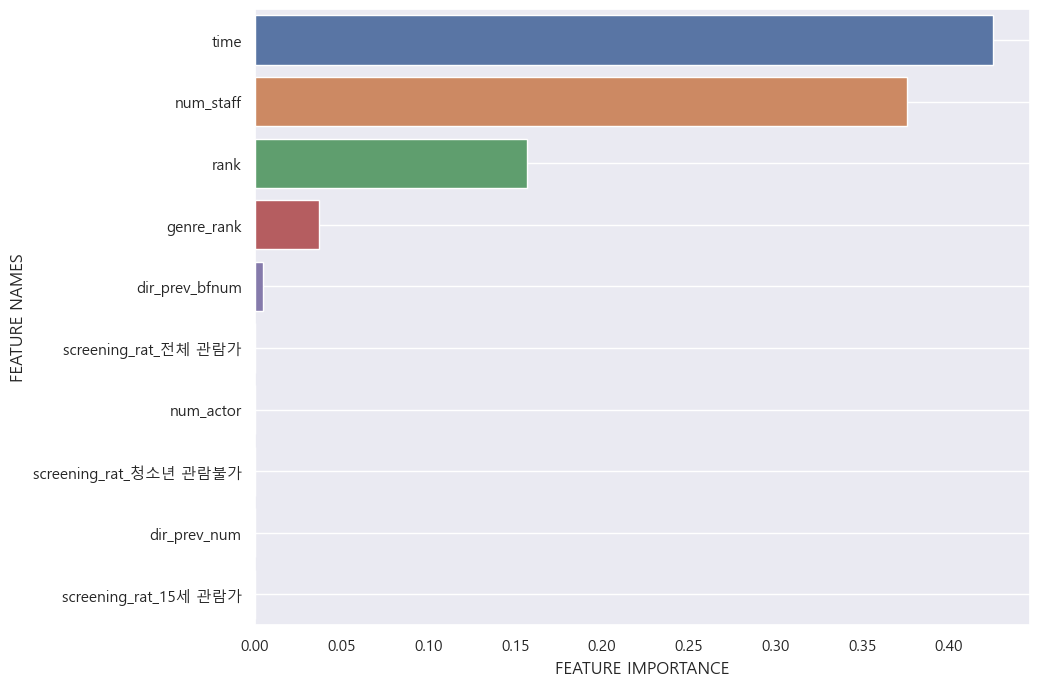

In [503]:
ufs.plot_feature_importance(model_rf_g.best_estimator_.feature_importances_,list(x_train))

In [504]:
pred_rf = model_rf_g.predict(x_val)



In [ ]:
ufs.Regressor_report(y_val,np.expm1(pred_rf))

In [505]:
ufs.Regressor_report(y_val,pred_rf)

MAE :  571946.8802342501
MAPE :  68.6108591206228
RMSE :  1397998.974720446


## CatBoost

In [51]:
model_cbt = cbt.CatBoostRegressor()

params_cbt =    {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10 ,30,50,70, 100]
                 }

model_cbt_g = GridSearchCV(model_cbt,params_cbt,cv=10,verbose=3)

In [52]:
model_cbt_g.fit(x_train,y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
0:	learn: 3.2757364	total: 157ms	remaining: 1.41s
1:	learn: 3.2544158	total: 159ms	remaining: 635ms
2:	learn: 3.2340156	total: 160ms	remaining: 373ms
3:	learn: 3.2149353	total: 161ms	remaining: 241ms
4:	learn: 3.1958919	total: 162ms	remaining: 162ms
5:	learn: 3.1758473	total: 163ms	remaining: 108ms
6:	learn: 3.1573751	total: 164ms	remaining: 70.1ms
7:	learn: 3.1363705	total: 164ms	remaining: 41.1ms
8:	learn: 3.1170606	total: 166ms	remaining: 18.4ms
9:	learn: 3.0982323	total: 166ms	remaining: 0us
[CV 1/10] END depth=4, iterations=10, learning_rate=0.01;, score=0.107 total time=   0.2s
0:	learn: 3.3042556	total: 846us	remaining: 7.62ms
1:	learn: 3.2821038	total: 1.48ms	remaining: 5.93ms
2:	learn: 3.2616980	total: 2.19ms	remaining: 5.12ms
3:	learn: 3.2422318	total: 2.91ms	remaining: 4.37ms
4:	learn: 3.2222473	total: 3.62ms	remaining: 3.62ms
5:	learn: 3.2009920	total: 4.27ms	remaining: 2.85ms
6:	learn: 3.1812132	total: 4.91ms

KeyboardInterrupt: 

In [125]:
pd_cbt = pd.DataFrame(model_cbt_g.cv_results_)
pd_cbt

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_depth  \
0         0.049573      0.064140         0.002399        0.000923           4   
1         0.029101      0.002857         0.002193        0.000400           4   
2         0.028750      0.001996         0.002393        0.000489           4   
3         0.040132      0.009105         0.002760        0.000584           4   
4         0.047475      0.009035         0.002506        0.000492           4   
..             ...           ...              ...             ...         ...   
135       1.905075      0.159652         0.004843        0.003219          10   
136       2.464898      0.342512         0.005303        0.003222          10   
137       2.581684      0.210597         0.004806        0.001394          10   
138       2.788294      0.309516         0.004109        0.000750          10   
139       2.686741      0.405933         0.007274        0.009923          10   

    param_iterations param_learning_rate  \
0                 10                0.01   
1                 10                0.02   
2                 10                0.03   
3                 10                0.04   
4                 30                0.01   
..               ...                 ...   
135               70                0.04   
136              100                0.01   
137              100                0.02   
138              100                0.03   
139              100                0.04   

                                                params  split0_test_score  \
0    {'depth': 4, 'iterations': 10, 'learning_rate'...           0.151150   
1    {'depth': 4, 'iterations': 10, 'learning_rate'...           0.282414   
2    {'depth': 4, 'iterations': 10, 'learning_rate'...           0.389932   
3    {'depth': 4, 'iterations': 10, 'learning_rate'...           0.481680   
4    {'depth': 4, 'iterations': 30, 'learning_rate'...           0.386677   
..                                                 ...                ...   
135  {'depth': 10, 'iterations': 70, 'learning_rate...           0.891570   
136  {'depth': 10, 'iterations': 100, 'learning_rat...           0.714528   
137  {'depth': 10, 'iterations': 100, 'learning_rat...           0.856507   
138  {'depth': 10, 'iterations': 100, 'learning_rat...           0.890021   
139  {'depth': 10, 'iterations': 100, 'learning_rat...           0.901295   

     split1_test_score  ...  split3_test_score  split4_test_score  \
0             0.101415  ...           0.097290           0.102308   
1             0.196674  ...           0.195254           0.200688   
2             0.279268  ...           0.283751           0.289226   
3             0.349719  ...           0.351946           0.349583   
4             0.274543  ...           0.269006           0.270460   
..                 ...  ...                ...                ...   
135           0.694155  ...           0.659997           0.762457   
136           0.520041  ...           0.503914           0.535180   
137           0.653296  ...           0.614847           0.692606   
138           0.698601  ...           0.648133           0.762269   
139           0.714640  ...           0.679300           0.791197   

     split5_test_score  split6_test_score  split7_test_score  \
0             0.111494           0.105743           0.108867   
1             0.201297           0.198076           0.214267   
2             0.282514           0.275041           0.308734   
3             0.356838           0.351026           0.382071   
4             0.284039           0.270462           0.294824   
..                 ...                ...                ...   
135           0.744577           0.719397           0.732599   
136           0.541840           0.534684           0.572261   
137           0.689599           0.681396           0.708747   
138           0.745851           0.724767           0.741303   
139           0.766506           0.745815    

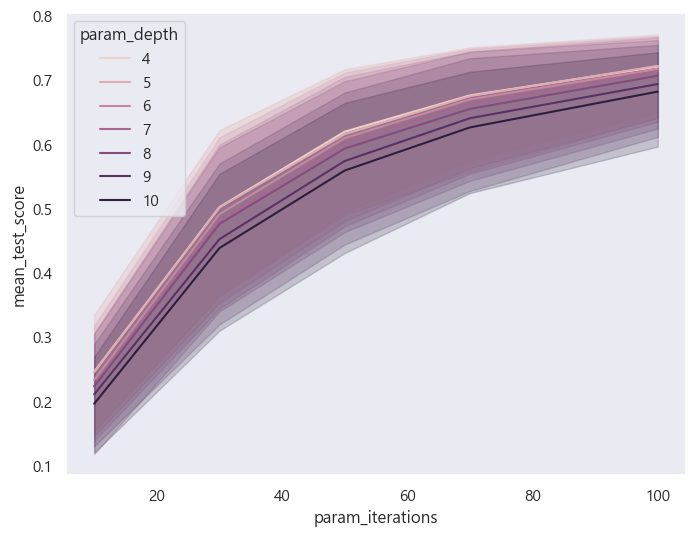

In [126]:
ufs.mean_test_score_lineplot(pd_cbt,x='param_iterations',hue='param_depth')

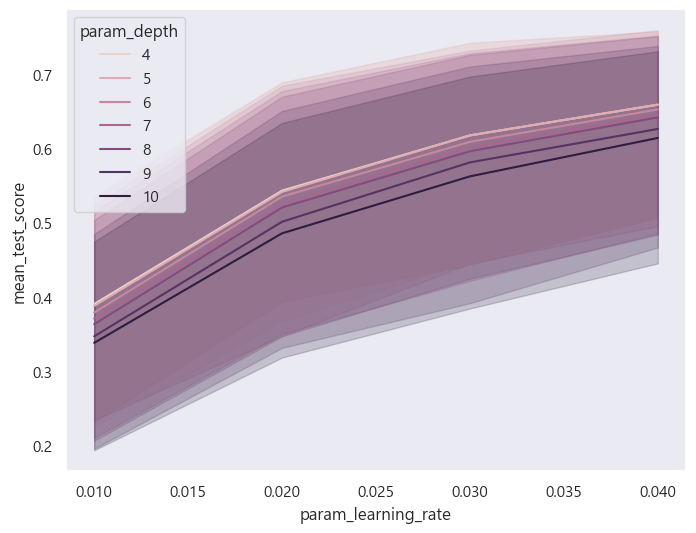

In [127]:
ufs.mean_test_score_lineplot(pd_cbt,x='param_learning_rate',hue='param_depth')

In [128]:
model_cbt_g.best_params_

{'depth': 5, 'iterations': 100, 'learning_rate': 0.04}

In [129]:
pred_cbt = model_cbt_g.predict(x_val)

ufs.Regressor_report(y_val,pred_cbt)

MAE :  1.1746528576212703
MAPE :  0.13992913207901095
RMSE :  1.6025882527038733


---

# 테스트

In [100]:
test_data.shape

(243, 12)

In [506]:
# {'depth': 5, 'iterations': 100, 'learning_rate': 0.04}
m_cbt = cbt.CatBoostRegressor(depth=5,iterations=100,learning_rate=0.04)

In [507]:
m_cbt.fit(x_train,y_train)

0:	learn: 1768950.5954499	total: 1.83ms	remaining: 181ms
1:	learn: 1743388.1633771	total: 3.36ms	remaining: 165ms
2:	learn: 1718412.5969995	total: 4.59ms	remaining: 148ms
3:	learn: 1694646.6576566	total: 5.85ms	remaining: 141ms
4:	learn: 1673671.9284987	total: 6.89ms	remaining: 131ms
5:	learn: 1653269.1363095	total: 7.89ms	remaining: 124ms
6:	learn: 1634281.2611229	total: 9.09ms	remaining: 121ms
7:	learn: 1613813.3235436	total: 10.4ms	remaining: 120ms
8:	learn: 1596680.0841081	total: 11.6ms	remaining: 117ms
9:	learn: 1578252.6612432	total: 14ms	remaining: 126ms
10:	learn: 1562033.0717645	total: 16ms	remaining: 130ms
11:	learn: 1546272.2136245	total: 17.3ms	remaining: 127ms
12:	learn: 1531908.9130638	total: 18.3ms	remaining: 123ms
13:	learn: 1516476.6222168	total: 19.4ms	remaining: 119ms
14:	learn: 1501978.1050272	total: 20.4ms	remaining: 116ms
15:	learn: 1489581.4172410	total: 21.4ms	remaining: 112ms
16:	learn: 1476207.8590766	total: 22.5ms	remaining: 110ms
17:	learn: 1461716.3834137	t

In [508]:
pred_cbt = m_cbt.predict(x_val)

In [393]:
ufs.Regressor_report(y_val,np.expm1(pred_cbt))

MAE :  0.10383544579181489
MAPE :  0.04593120496845834
RMSE :  0.1388180653798454


In [509]:
ufs.Regressor_report(y_val,pred_cbt)

MAE :  553859.4697514318
MAPE :  521.4389227433852
RMSE :  1356534.9142666839


## VotingRegressor

In [510]:
from sklearn.ensemble import VotingRegressor

model_vot = VotingRegressor([('line',model_line_g.best_estimator_),('rf',model_rf_g.best_estimator_),('cbt',m_cbt)])



model_vot_g = GridSearchCV(model_vot,dict(),cv=10,verbose=3)



In [511]:
model_vot_g.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0:	learn: 1776896.5457145	total: 1.16ms	remaining: 114ms
1:	learn: 1755561.9221123	total: 2.14ms	remaining: 105ms
2:	learn: 1732203.0215284	total: 3.09ms	remaining: 100ms
3:	learn: 1710188.8683115	total: 4.05ms	remaining: 97.2ms
4:	learn: 1687708.6878490	total: 5.37ms	remaining: 102ms
5:	learn: 1670981.2677093	total: 6.33ms	remaining: 99.2ms
6:	learn: 1652703.5378397	total: 7.67ms	remaining: 102ms
7:	learn: 1629979.8000065	total: 8.6ms	remaining: 98.8ms
8:	learn: 1614318.3670478	total: 9.65ms	remaining: 97.6ms
9:	learn: 1594619.5970971	total: 10.6ms	remaining: 95.3ms
10:	learn: 1578604.6291042	total: 11.6ms	remaining: 94ms
11:	learn: 1560004.5385725	total: 12.5ms	remaining: 91.8ms
12:	learn: 1546711.9839747	total: 13.4ms	remaining: 89.9ms
13:	learn: 1532466.9533994	total: 14.3ms	remaining: 88ms
14:	learn: 1517697.4628093	total: 15.2ms	remaining: 86ms
15:	learn: 1512365.3771734	total: 16.1ms	remaining: 84.3ms
16:	learn: 149901

GridSearchCV(cv=10,
             estimator=VotingRegressor(estimators=[('line', LinearRegression()),
                                                   ('rf',
                                                    RandomForestRegressor(max_depth=8,
                                                                          min_samples_leaf=20,
                                                                          n_estimators=10)),
                                                   ('cbt',
                                                    <catboost.core.CatBoostRegressor object at 0x00000198BD8223A0>)]),
             param_grid={}, verbose=3)

In [513]:
pred_val = model_vot_g.predict(x_val)



In [ ]:
ufs.Regressor_report(y_val,np.expm1(pred_val))

In [514]:
ufs.Regressor_report(y_val_s,pred_val)

MAE :  717456.3983859847
MAPE :  325286.63752463413
RMSE :  1138339.5362552858


In [520]:
pred_ans = model_vot_g.predict(test_data)

## Blending

In [539]:
pred_res_cbt = m_cbt.predict(test_data)
pred_res_rf = model_rf_g.predict(test_data)

In [542]:
pred_res = (pred_res_cbt + pred_res_rf) / 2

In [543]:
ans = pd.DataFrame({'title': test['title'],
                   'box_off_num':pred_res} )

In [544]:
ans.shape

(243, 2)

In [545]:
ans.sort_values('title')

title   box_off_num
153.0    이것이 우리의 끝이다  1.471171e+04
162.0            10분  4.939000e+05
92.0            I AM  7.676294e+05
39.0         REC 알이씨  9.676347e+03
71.0          가문의 귀환  5.764330e+05
...              ...           ...
90.0     황제펭귄 펭이와 솜이  2.823892e+04
5.0           회오리 바람  5.589356e+04
57.0             회초리  1.000248e+06
93.0      후궁 : 제왕의 첩  1.310016e+06
118.0      힘내세요, 병헌씨  7.337000e+04

[243 rows x 2 columns]

In [546]:
ans.set_index('title',inplace=True)

In [547]:
ans.to_csv('submission.csv')

In [548]:
submission = pd.read_csv('submission.csv')

In [103]:
submission = pd.read_csv('./영화 관객수/submission.csv')

In [105]:
submission

title  box_off_num
0             용서는 없다            0
1        아빠가 여자를 좋아해            0
2                하모니            0
3                의형제            0
4              평행 이론            0
..               ...          ...
238        해에게서 소년에게            0
239           울보 권투부            0
240             어떤살인            0
241        말하지 못한 비밀            0
242  조선안방 스캔들-칠거지악 2            0

[243 rows x 2 columns]